## Bisection method

In [44]:
import numpy as np

In [53]:
def bisect(func, low, high, N, tolerance=None):
    assert not (func(low) * func(high))  > 0 
    for i in range(N):
        midpoint = (low + high) / 2.0
        print(midpoint)
        if (func(low) * func(midpoint))>0:
            low = midpoint
        else:
            high = midpoint
        if tolerance is not None and abs(high - low) < tolerance:
            break   
    return midpoint

In [54]:
f = lambda x: x**3 -3*x + 1
a = 1
b = 3
N = 8
tol = 1e-6
bisect(f, a, b, N, tol)

2.0
1.5
1.75
1.625
1.5625
1.53125
1.546875
1.5390625


1.5390625

## False Position Method

In [29]:
# Implementing False Position Method
def falsePosition(f, x0, x1, e):
    # Checking Correctness of initial guess values and false positioning
    if f(x0) * f(x1) > 0.0:
        print('Given guess values do not bracket the root.')
        exit(0)
    step = 1
    print('\n\n*** FALSE POSITION METHOD IMPLEMENTATION ***')
    condition = True
    while condition:
        x2 = x0 - (x1-x0) * f(x0)/( f(x1) - f(x0) )
        print('Iteration-%d, x2 = %0.6f and f(x2) = %0.6f' % (step, x2, f(x2)))

        if f(x0) * f(x2) < 0:
            x1 = x2
        else:
            x0 = x2

        step = step + 1
        condition = abs(f(x2)) > e

    print('\nRequired root is: %0.8f' % x2)

In [30]:
f = lambda x : x**3-5*x-9
x0 = 2
x1 = 3
tol = 1e-6
falsePosition(f, x0, x1, tol)



*** FALSE POSITION METHOD IMPLEMENTATION ***
Iteration-1, x2 = 2.785714 and f(x2) = -1.310860
Iteration-2, x2 = 2.850875 and f(x2) = -0.083923
Iteration-3, x2 = 2.854933 and f(x2) = -0.005125
Iteration-4, x2 = 2.855180 and f(x2) = -0.000312
Iteration-5, x2 = 2.855196 and f(x2) = -0.000019
Iteration-6, x2 = 2.855196 and f(x2) = -0.000001
Iteration-7, x2 = 2.855197 and f(x2) = -0.000000

Required root is: 2.85519654


## Newton Raphson method

In [24]:
def my_newton(f, df, x0, tol):
    if abs(f(x0)) < tol:
        return x0
    else:
        return my_newton(f, df, x0 - f(x0)/df(x0), tol)

In [27]:
f = lambda x : x**2 -2 
df = lambda x: 2*x
x0 = 1.5
tol = 1e-6
my_newton(f, df, x0, tol)

1.4142135623746899

## Secant method

In [32]:
def secant(f, fprime, x0, x1, N): 
    step = 1
    condition = True
    while condition:
        if f(x0) == f(x1):
            break
        x2 = x0 - (x1-x0)*f(x0)/( f(x1) - f(x0) ) 
        x0 = x1
        x1 = x2
        step = step + 1
        if step > N:
            break
        condition = abs(f(x2)) > 1e-4
    return x2

In [33]:
f = lambda x: x**3 - 3*x +1 
fprime = lambda x: 3*x**2 - 3
x0 = 0.4
x1 = 1
N = 1000
secant(f,df,x0,x1, N)

0.3472910976345784

## newton and Larange

In [35]:
def findA(x, y):
    m = len(x)
    x = np.copy(x)
    a = np.copy(y)
    for k in range(1, m):
        a[k:m] = (a[k:m] - a[k - 1])/(x[k:m] - x[k - 1])
    return a
    
def newton(x, x_data, y_data):
    a = findA(x_data, y_data)
    n = len(x_data) - 1 
    p = a[n]
    for k in range(1, n + 1):
        p = a[n - k] + (x - x_data[n - k])*p
    return p

In [36]:
newton(-1, (1,2,3,-4,5), (2,48,272,1182,2262))

12

In [39]:
from math import *

def product(a):
    p = 1
    for i in a:p*=i
    return p
def Lagrange(x,a,fa):
    r = range(len(fa))
    a0 = [fa[i]/product(a[i]-a[j]for j in r if j!=i)for i in r]
    return sum(a0[i]*product([x-a[j]for j in r if j!=i])for i in r)

In [38]:
a=(1,2,3,-4,5)
fa = (2,48,272,1182,2262)
x = -1
Lagrange(x,a,fa)

11.999999999999886

## Richardson method

In [41]:
def richardson_diff(f, x,h=0.75,N=2):
    d = np.array( [[0] * (N + 1)] * (N + 1), float )

    for i in range( N + 1 ):
        d[i,0] = 0.5 * ( f( x + h ) - f( x - h ) ) / h

        powerOf4 = 1  
        for j in range( 1, i + 1 ):
            powerOf4 = 4 * powerOf4
            d[i,j] = d[i,j-1] + ( d[i,j-1] - d[i-1,j-1] ) / ( powerOf4 - 1 )

        h = 0.5 * h

    return d[-1][-1]

In [42]:
f = lambda x: x**6
richardson_diff(2)

192.0

## Fix point

In [43]:
class Solution(object):
   def fixedPoint(self, A):
      for i in range(len(A)):
         if i == A[i]:
            return i
      return -1
ob1 = Solution()
print(ob1.fixedPoint([-10,-5,0,3,7]))

3


## Taylor series

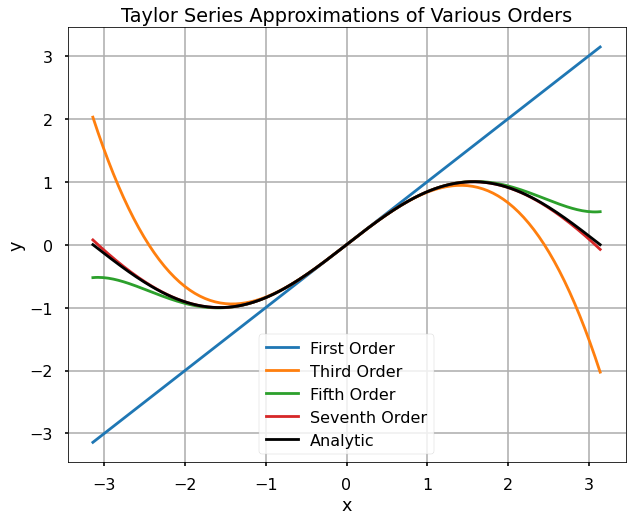

In [48]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
x = np.linspace(-np.pi, np.pi, 200)
y = np.zeros(len(x))

labels = ['First Order', 'Third Order', 'Fifth Order', 'Seventh Order']

plt.figure(figsize = (10,8))
for n, label in zip(range(4), labels):
    y = y + ((-1)**n * (x)**(2*n+1)) / np.math.factorial(2*n+1)
    plt.plot(x,y, label = label)

plt.plot(x, np.sin(x), 'k', label = 'Analytic')
plt.grid()
plt.title('Taylor Series Approximations of Various Orders')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()